### Adding noise to electron energy signal

The aim of this notebook is to add noise to the energy images of electrons by the addition of both energy and noise numpy arrays

In [2]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
original_dataset_dir = '/gpfs/projects/damic/cropped_images/'

electrons = glob.glob1(original_dataset_dir,"*11.npz")

Text(0.5, 1.0, 'Electron energy')

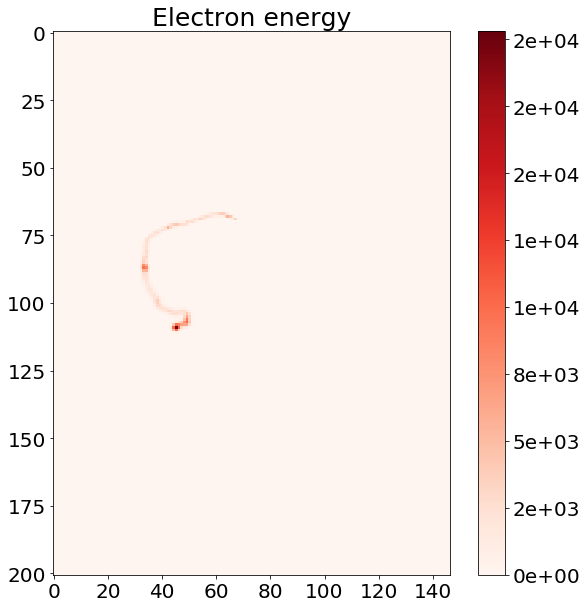

In [4]:
e = np.load(os.path.join(original_dataset_dir, electrons[100]))['energy']
n = np.load(os.path.join(original_dataset_dir, electrons[100]))['noise']

fig_e = plt.figure(figsize=(10,10))
plt.imshow(e, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy", fontsize = 25)

Text(0.5, 1.0, 'Electron noise')

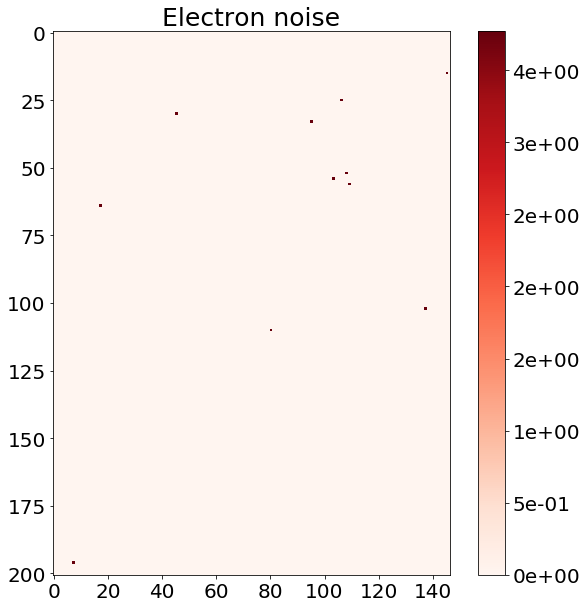

In [5]:
fig_n = plt.figure(figsize=(10,10))
plt.imshow(n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
plt.title("Electron noise", fontsize = 25)

Text(0.5, 1.0, 'Electron energy + noise')

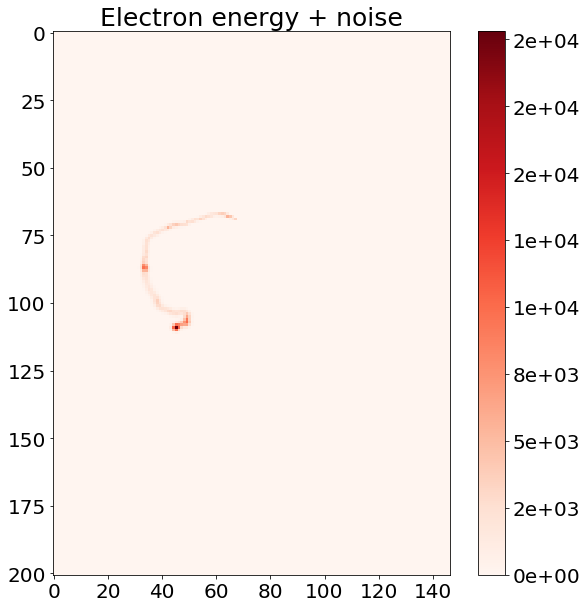

In [6]:
e_n = np.add(n,e)
fig_e_n = plt.figure(figsize=(10,10))
plt.imshow(e_n, cmap='Reds')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20)
cb = plt.colorbar(format='%.0e')
cb.ax.tick_params(labelsize=20)
plt.title("Electron energy + noise", fontsize = 25)

Noise has been added but since the value of noisy pixels is so low, it is not possible to differeciate them in the image. Now we will prepare the data with: electron+noise, noise. So the network will have to distinguish the electron in a noisy image

In [7]:
elements = len(electrons)

all_electron_energy = [np.load(os.path.join(original_dataset_dir, electrons[_]))['energy'] for _ in range(elements)]
all_electron_noise = [np.load(os.path.join(original_dataset_dir, electrons[_]))['noise'] for _ in range(elements)]

In [8]:
all_electron_energy_ = np.dstack(all_electron_energy)
all_electron_energy_ = np.rollaxis(all_electron_energy_,-1)
print(all_electron_energy_.shape)

all_electron_noise_ = np.dstack(all_electron_noise)
all_electron_noise_ = np.rollaxis(all_electron_noise_, -1)
print(all_electron_noise_.shape)

(2628, 201, 147)
(2628, 201, 147)


In [9]:
#now we add noise to energy images:

electron_noisy_energy = all_electron_energy_+ all_electron_noise_
electron_noisy_energy.shape

(2628, 201, 147)

In [10]:
labels_electron= np.repeat(1, electron_noisy_energy.shape[0])

labels_noise = np.repeat(0, all_electron_noise_.shape[0])

In [11]:
X = np.concatenate((electron_noisy_energy, all_electron_noise_), axis=0) #noisy energy followed by noise
y = np.concatenate((labels_electron, labels_noise), axis=0) #energy labels followed by noise labels

In [12]:
print("%f gb of data+labels" % ((X.size * X.itemsize + y.size * y.itemsize) *10**(-9)))

1.242434 gb of data+labels


In [13]:
np.array_equal(all_electron_noise_, electron_noisy_energy)

False

In [14]:
np.array_equal(all_electron_energy_, electron_noisy_energy) #we prove that the energy is not the same as noise+energy

False

In [15]:
np.savez_compressed('/gpfs/projects/damic/eVSn_noisy1', data=X, labels=y)

In [16]:
loaded = np.load('/gpfs/projects/damic/eVSn_noisy1.npz')

In [17]:
np.array_equal(loaded['data'][0],electron_noisy_energy[0])

True

In [18]:
np.array_equal(loaded['data'][0],all_electron_energy_[0])#we prove again that the energy is not the same as noise+energy

False